Image Classification usaing CNN

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np 
import matplotlib.pyplot as plt 


In [6]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1)

In [13]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship', 'truck']

In [14]:
def plot_sample(X, y, index):
    if index < len(X):
        plt.figure(figsize=(15, 2))
        plt.imshow(X[index])
        plt.xlabel(classes[y[index]])
    else:
        print("Index out of range.")


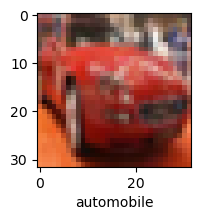

In [15]:
plot_sample(X_train,y_train,5)

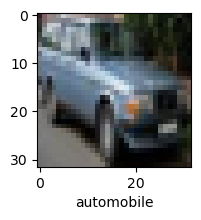

In [16]:
plot_sample(X_train,y_train,201)

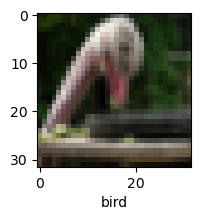

In [17]:
plot_sample(X_train,y_train, 400)

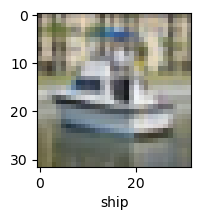

In [18]:
plot_sample(X_train,y_train, 501)



In [19]:
X_train = X_train/255.0
X_test = X_test/255.0

In [20]:


ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)
   



Epoch 1/5


1563/1563 [==============================] - 95s 60ms/step - loss: 1.8099 - accuracy: 0.3544
Epoch 2/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.6222 - accuracy: 0.4265
Epoch 3/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5419 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4795 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 93s 60ms/step - loss: 1.4301 - accuracy: 0.4966


In [21]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np 
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification report: \n',classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.36      0.67      0.47      1000
           1       0.72      0.38      0.50      1000
           2       0.46      0.20      0.28      1000
           3       0.32      0.45      0.38      1000
           4       0.45      0.38      0.41      1000
           5       0.42      0.30      0.35      1000
           6       0.53      0.53      0.53      1000
           7       0.67      0.41      0.51      1000
           8       0.40      0.79      0.53      1000
           9       0.64      0.39      0.48      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [22]:
import seaborn as sns 


<function matplotlib.pyplot.show(close=None, block=None)>

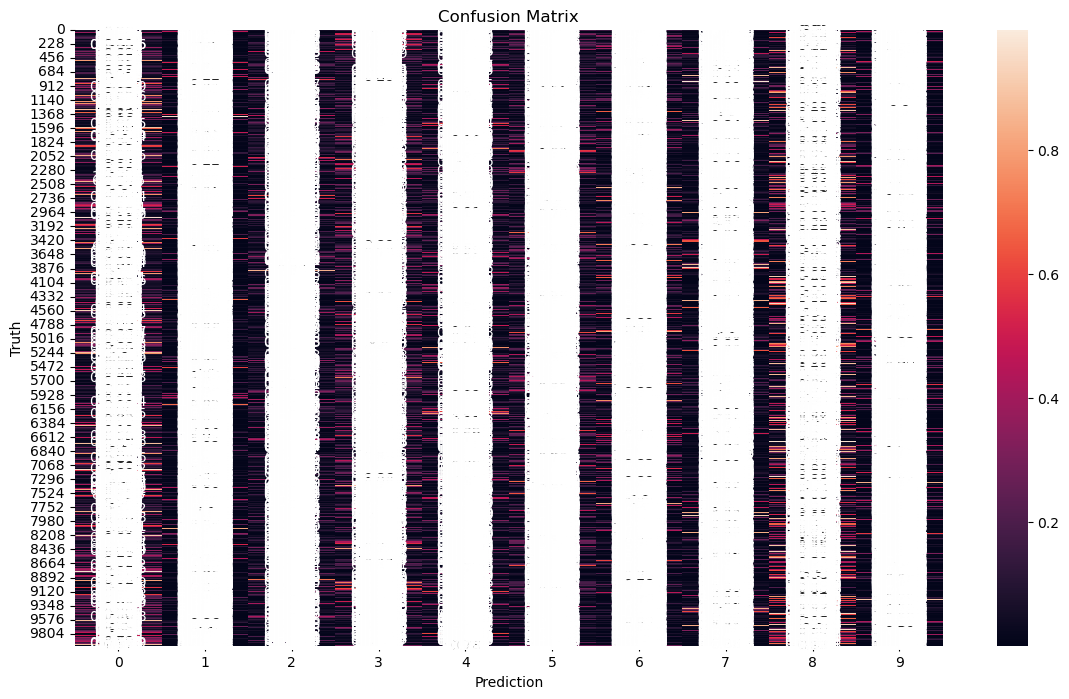

In [23]:
plt.figure(figsize=(14,8))
sns.heatmap(y_pred,annot= True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show

In [26]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [27]:
cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [28]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 10ms/step - loss: 1.4550 - accuracy: 0.4770
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1154 - accuracy: 0.6103
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9909 - accuracy: 0.6574
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9091 - accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8469 - accuracy: 0.7050
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7895 - accuracy: 0.7254
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7409 - accuracy: 0.7401
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6990 - accuracy: 0.7563
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6551 - accuracy: 0.7707
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step -

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 10s 3ms/step - loss: 0.9587 - accuracy: 0.6920


[0.9586671590805054, 0.6919999718666077]

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[2.79452997e-05, 1.75068958e-03, 1.31210021e-03, 8.35832059e-01,
        3.67679429e-04, 1.18180506e-01, 3.78401987e-02, 6.42847317e-06,
        4.55256831e-03, 1.29732289e-04],
       [3.36309569e-03, 2.79910234e-03, 5.51217727e-06, 2.46265415e-07,
        3.05296100e-09, 1.68001846e-09, 3.74512588e-10, 5.39120570e-09,
        9.93660152e-01, 1.71761101e-04],
       [1.40102347e-02, 1.82979107e-02, 1.03111088e-03, 3.17872362e-03,
        3.31998628e-04, 1.68445884e-04, 8.10088823e-05, 4.89781087e-05,
        9.50776756e-01, 1.20749054e-02],
       [9.49686050e-01, 1.96462697e-05, 3.31590272e-04, 1.87850073e-05,
        7.35799813e-06, 1.07613452e-07, 1.81643003e-07, 6.51329701e-09,
        4.99358550e-02, 4.43325746e-07],
       [8.02302020e-06, 2.01375969e-05, 1.64689794e-02, 1.22246578e-01,
        4.01854105e-02, 1.22137098e-02, 8.08803976e-01, 9.43689884e-06,
        4.26934603e-05, 1.04692356e-06]], dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

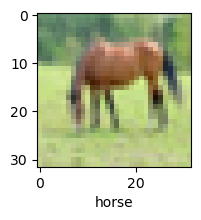

In [34]:
plot_sample(X_test,y_test,60)

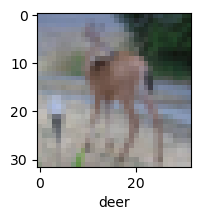

In [35]:
plot_sample(X_test,y_test,100)

In [36]:
classes[y_classes[4]]

'frog'